In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0
test_images = test_images.reshape((10000, 28*28)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


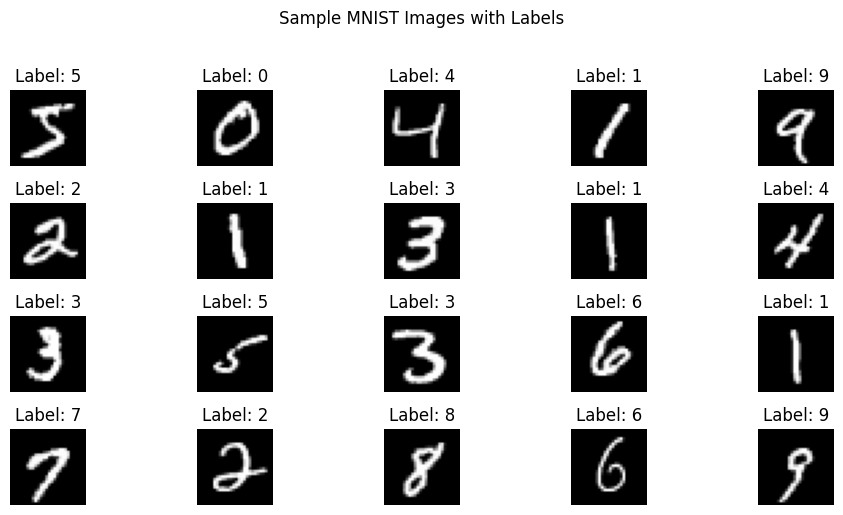

In [4]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

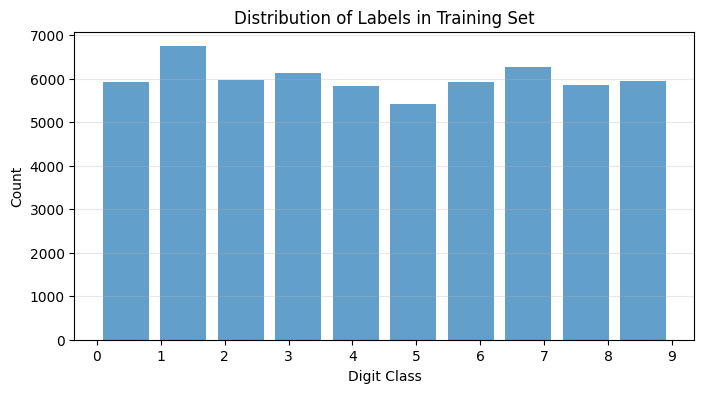

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential([
    Dense(784, activation='tanh', input_shape=(28*28,)),
    BatchNormalization(),
    Dropout(0.25),

    Dense(392, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(196, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(10, activation='softmax')  # Output layer
])


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8260 - loss: 0.5759 - val_accuracy: 0.9464 - val_loss: 0.1782
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9341 - loss: 0.2236 - val_accuracy: 0.9616 - val_loss: 0.1337
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.9493 - loss: 0.1747 - val_accuracy: 0.9663 - val_loss: 0.1176
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9608 - loss: 0.1387 - val_accuracy: 0.9720 - val_loss: 0.1033
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9655 - loss: 0.1165 - val_accuracy: 0.9764 - val_loss: 0.0857
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9705 - loss: 0.0983 - val_accuracy: 0.9728 - val_loss: 0.0948
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9737 - loss: 0.0875 - val_accuracy: 0.9769 - val_loss: 0.0753
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9759 - loss: 0.0801 - 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9775 - loss: 0.0790

Test accuracy: 0.9805


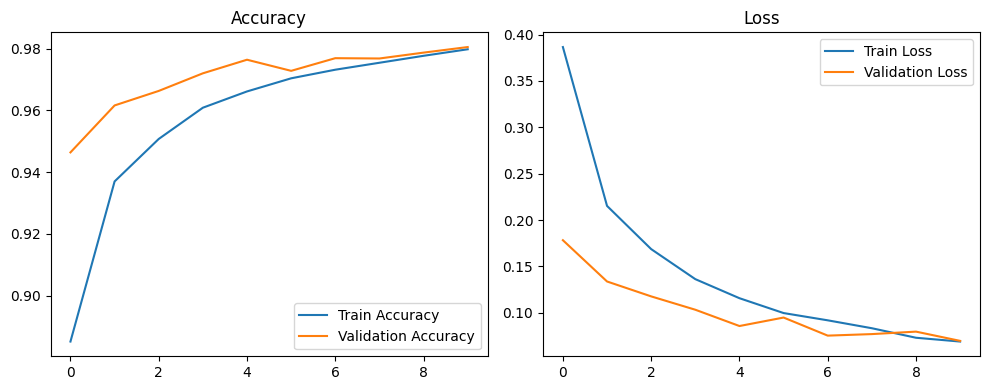

In [16]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


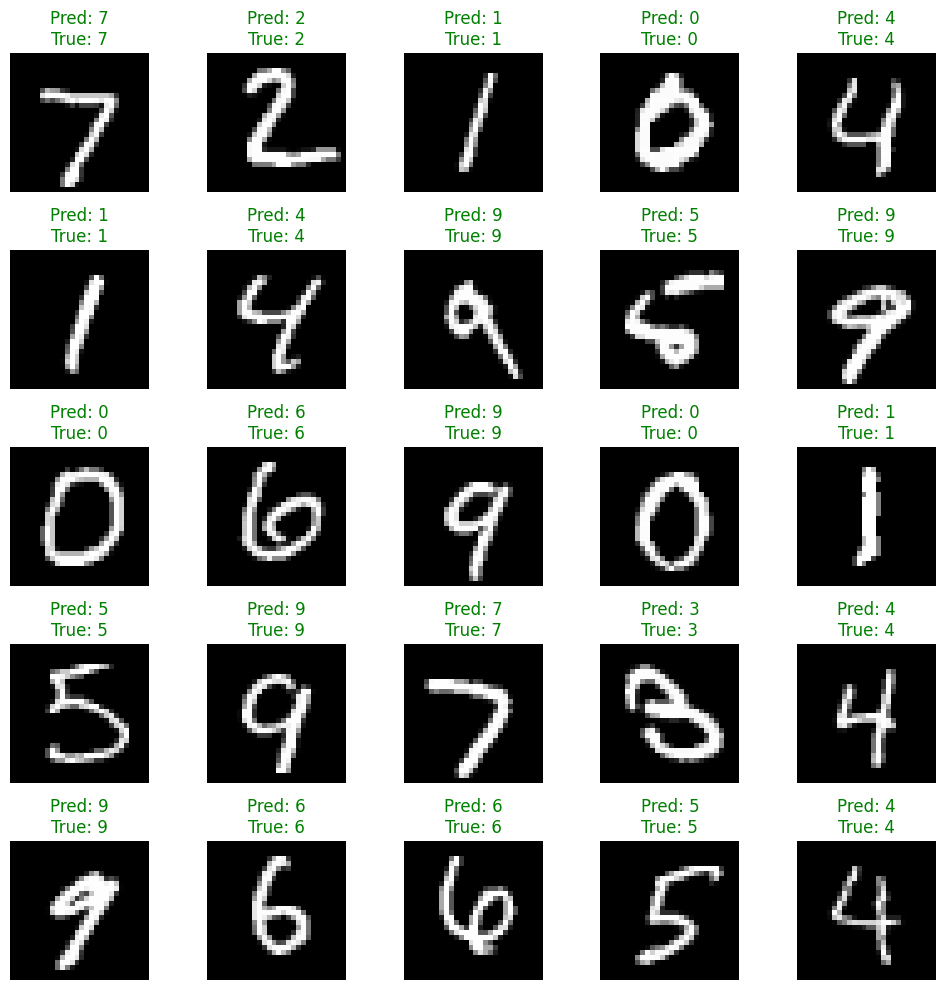

In [17]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()